![imagen](./img/seaborn.png)


# Exploratory Data Analysis with Seaborn
Entender cómo se hacen las gráficas en python está muy bien, pero lo importante es saber cuándo usarlas. En este notebook no se pretende explicar todos los tipos de gráficas que hay (histogramas, scatter plots, heatmaps...), en primer lugar porque es imposible abarcarlo todo, y en segundo lugar porque hay que ir un paso atrás antes de elegir la gráfica, ya que tenemos que comprender de qué tipo son los datos y qué es lo que estamos buscando con cada gráfica.

Por tanto, primero tendremos que identificar el tipo de los datos y cuántas variables vamos a representar
- Una varibale numérica
- Una variable categórica
- Dos variables numércias
- Tres o más variables numércias
- Dos variablees categóricas
- Variables numércias y categóricas

Teniendo claro esto, junto con un buen catálogo de gráficas, lo tendremos mucho más fácil.

https://www.data-to-viz.com/

In [8]:
# Importamos todos los paquetes que vayamos a necesitar
from sklearn.datasets import load_iris, fetch_california_housing
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Algunas configuraciones de los paquetes
pd.set_option("display.max_rows", 500) # Cuántas filas de los DataFrames nos "escupe" pandas en el Notebook
sns.set(color_codes=True)

#import warnings
#warnings.filterwarnings("ignore")

In [9]:
import sklearn
sklearn.__version__

'1.6.1'

In [10]:
# Cargamos las features en un DataFrame:
iris_df = pd.DataFrame(load_iris()["data"],columns=load_iris()["feature_names"])

# Y añadimos la columna de especies:
iris_df["target"] = load_iris()["target_names"][load_iris()["target"]]

# Cargamos tb el dataset del titanic
titanic_df = pd.read_csv("data/titanic.csv", sep="\t")

# Cargamos los datos del supermarket sales
market_df = pd.read_csv("data/supermarket_sales.csv")



In [11]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
market_df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [13]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# Tipos de las variables
Antes de representar cualquier variable es imprescindible comprender qué tipo de datos queremos representar. Tenemos los siguientes:

![imagen](./img/dtypes.png)

## 1. Análisis univariante
### 1.1 Variables cuantitativas
Si queremos ver cómo se distribuyen los precios de venta de tickets del Titanic.
#### Densidad

[Documentación](https://seaborn.pydata.org/generated/seaborn.distplot.html)

Este tipo de gráficas nos sirven para ver la distribución de los datos, donde se concentran más, ¿es dispersa? ¿tiene asimétrica? ¿por qué? ¿Hay outliers?

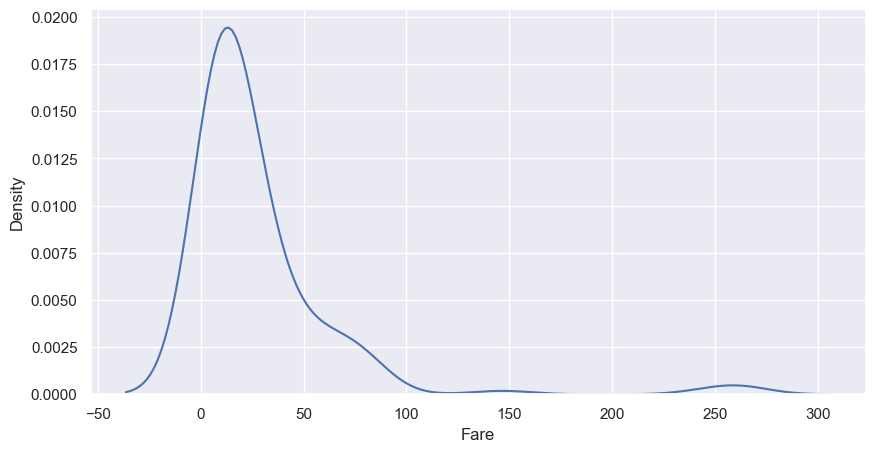

In [14]:
plt.figure(figsize=(10,5))
sns.kdeplot(titanic_df["Fare"]);


#### Histograma
También podemos verlo en un histograma

[Documentación](https://seaborn.pydata.org/generated/seaborn.distplot.html)

Los histogramas dan la frecuencia de aparición de todos los valores. Muy similar al diagrama de densidad anterior. La diferencia es que ahora el eje y es un conteo y no la probabilidad de aparición de los valores de la variable.

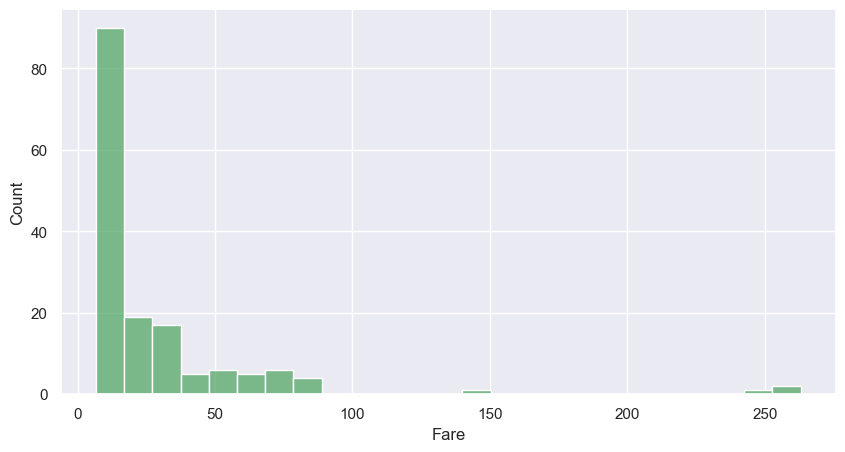

In [15]:
plt.figure(figsize=(10,5))
sns.histplot(titanic_df["Fare"], kde=False, color = "g");

Podemos agrupar (visualmente) una variable numérica. Podría ser una posible categorización de los billetes

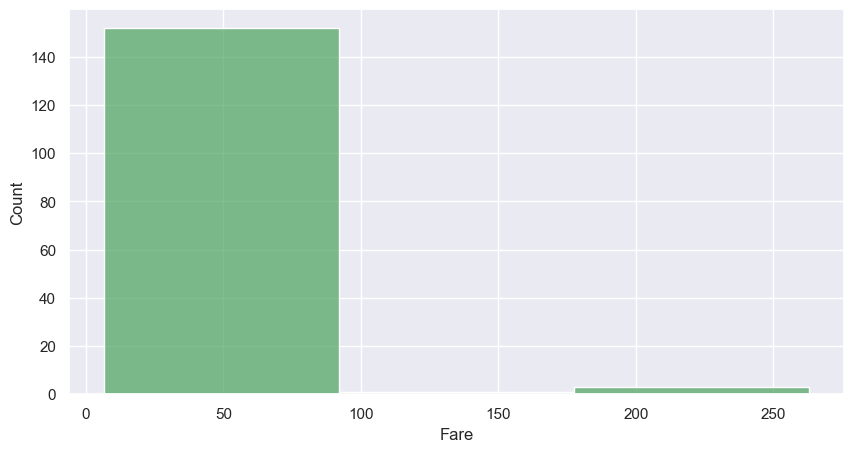

In [16]:
plt.figure(figsize=(10,5))
sns.histplot(titanic_df["Fare"], kde=False, color="g", bins = 3);


#### Histograma + Densidad



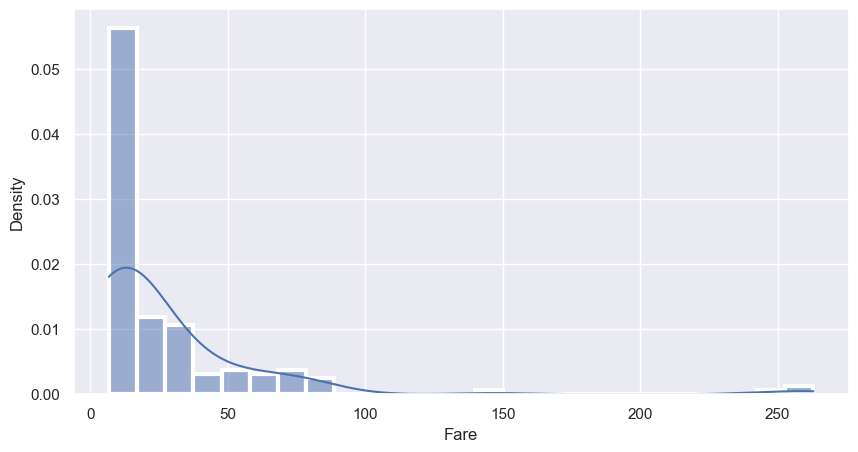

In [17]:
plt.figure(figsize=(10,5))
sns.histplot(titanic_df["Fare"],kde=True, stat="density", linewidth=3);



Otra manera muy visual de ver la concentración de los valores es mediante el argumento `rug`

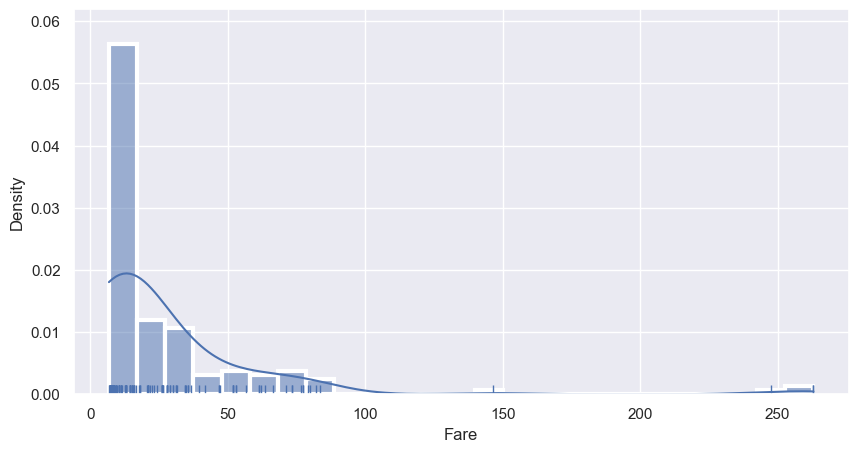

In [18]:
plt.figure(figsize=(10,5))
sns.histplot(titanic_df["Fare"], kde=True, stat="density", linewidth=3);

sns.rugplot(titanic_df["Fare"]);

#### Boxplot

[Colores de Matplotlib](https://matplotlib.org/3.1.0/gallery/color/named_colors.html)

[Boxlot](https://seaborn.pydata.org/generated/seaborn.boxplot.html)

Los boxplots dan una información muy parecida a los gráficos vistos anteriormente, aunque en este caso destaca mucho más los outliers.

<Axes: xlabel='Fare'>

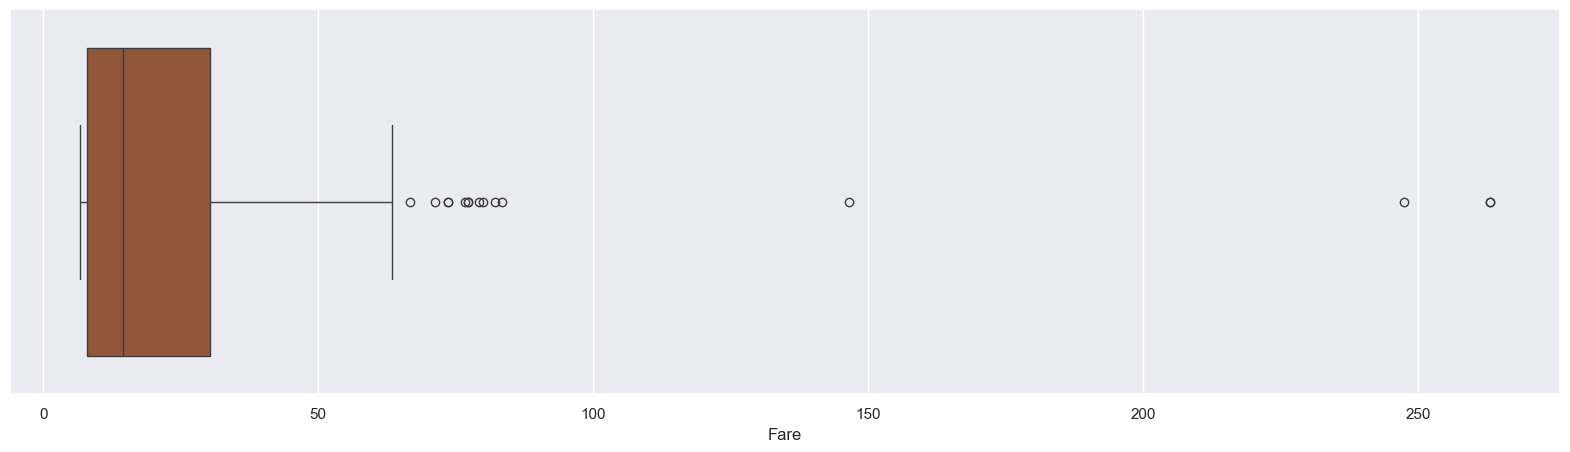

In [19]:
plt.figure(figsize=(20,5))
sns.boxplot(titanic_df["Fare"], color="sienna", orient="h")


![imagen](./img/boxplot.png)

#### Violinplot

[Colores de Matplotlib](https://matplotlib.org/3.1.0/gallery/color/named_colors.html)

[Violinplot](https://seaborn.pydata.org/generated/seaborn.violinplot.html)

Igual que un diagrama de caja, pero en este caso tiene la función de distribución en lugar de la propia caja

<Axes: ylabel='Fare'>

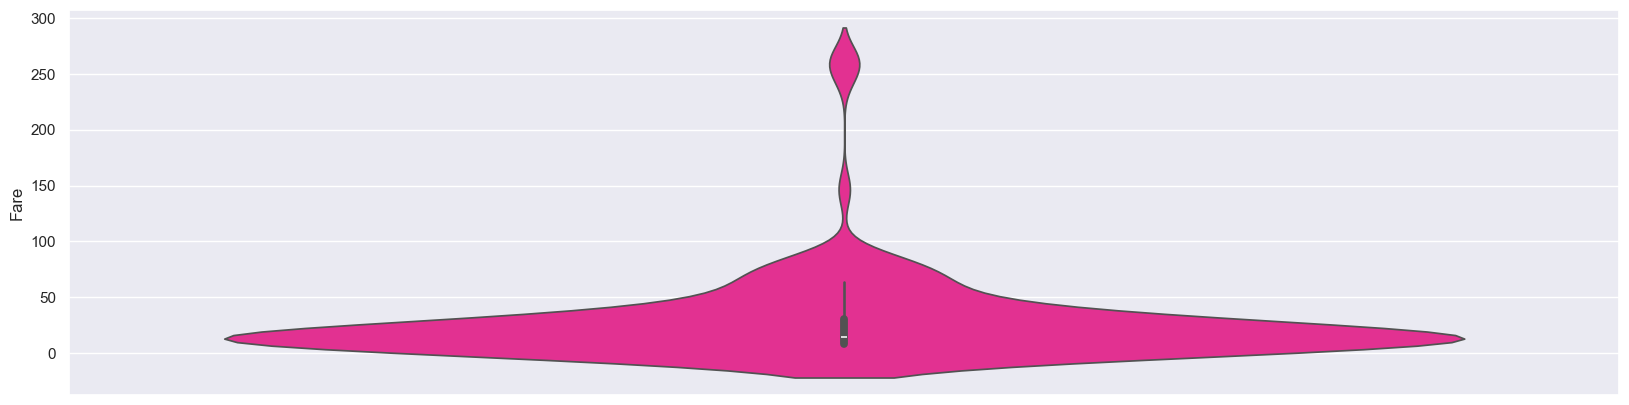

In [20]:
plt.figure(figsize=(20,5))
sns.violinplot(data = titanic_df["Fare"], color = "deeppink")

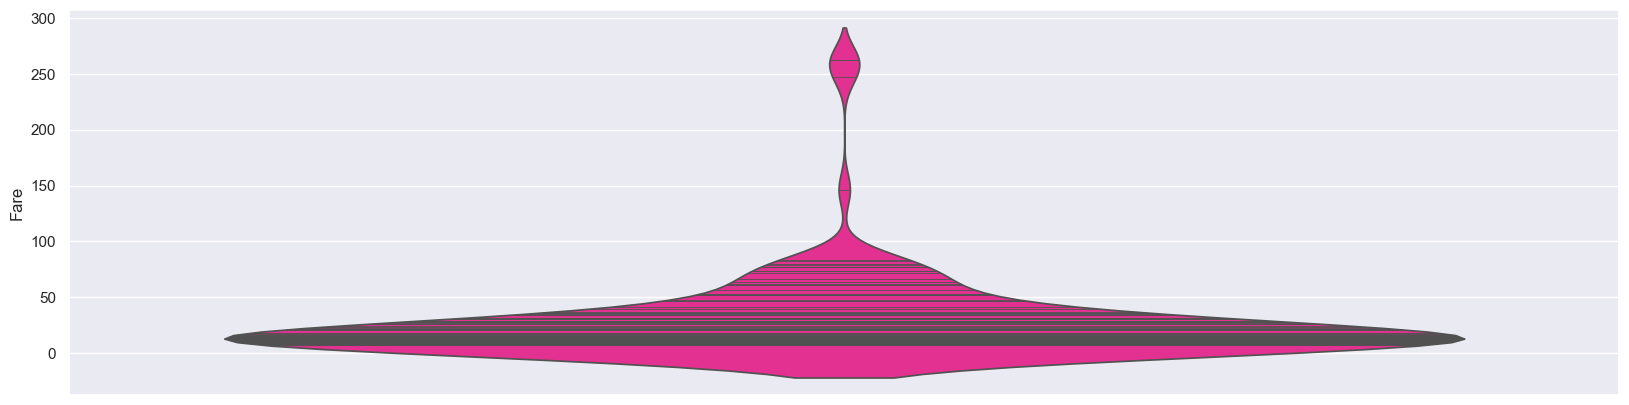

In [21]:
plt.figure(figsize=(20,5))
sns.violinplot(data = titanic_df["Fare"], color = "deeppink", inner = "stick");

### 1.2 Variables cualitativas
Para representar una variable categórica tendremos que ver su frecuencia de valores

En este caso vamos a ver qué tipo de embarque ha sido el más frecuente.

[Documentacion](https://seaborn.pydata.org/generated/seaborn.countplot.html)

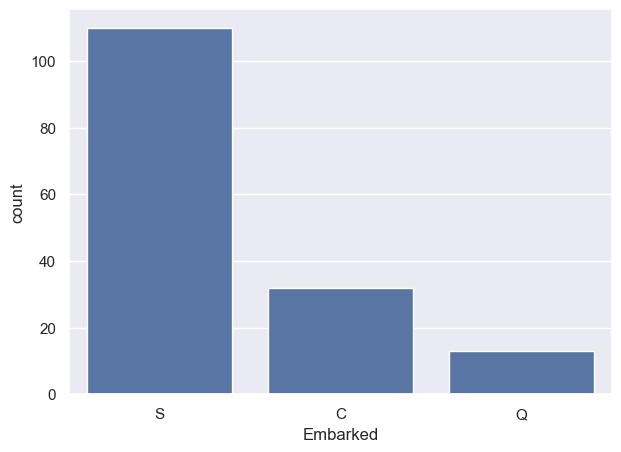

In [22]:
plt.figure(figsize=(7,5))
sns.countplot(x = titanic_df["Embarked"]);

#### Lollipop

¿Cuáles han sido los productos más pedidos?

[Documentación](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.hlines.html)

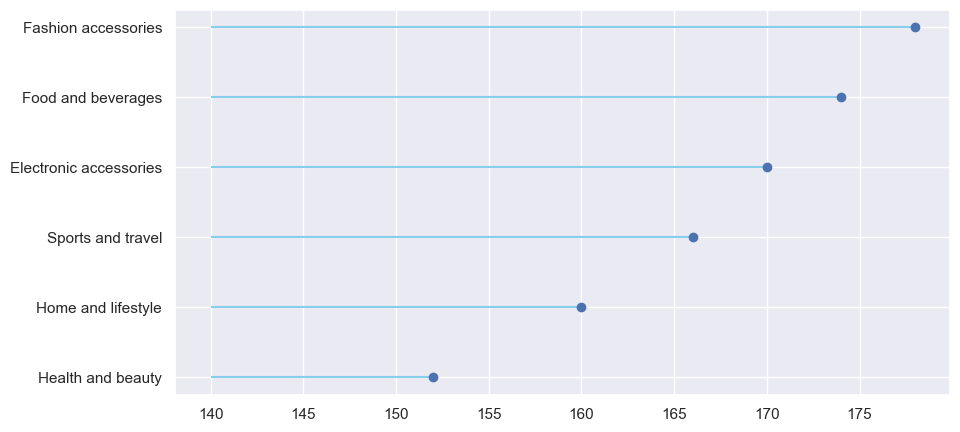

In [23]:
conteo = market_df['Product line'].value_counts(ascending=True)

plt.figure(figsize=(10,5))
plt.hlines(y=conteo.index,
           xmin=140,
           xmax=conteo,
           color='skyblue')
plt.plot(conteo, conteo.index, "o");


#### Donut chart/Pie chart

[Documentación](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.pie.html)

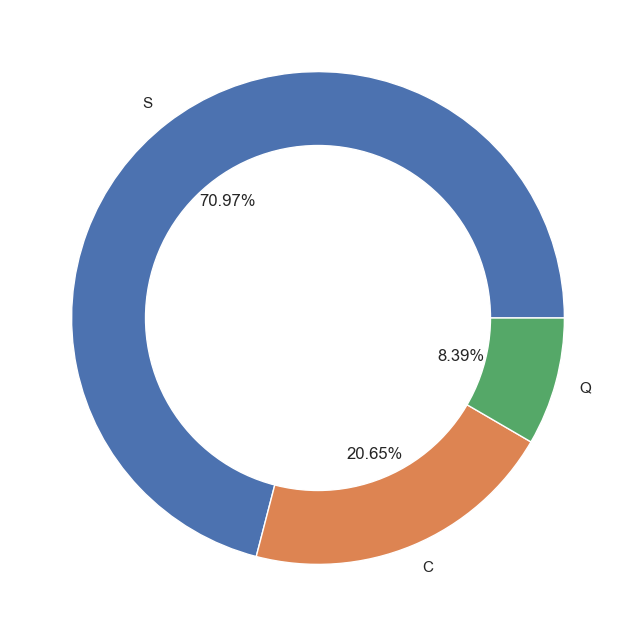

In [24]:
import matplotlib.pyplot as plt
 
# create data
data = titanic_df["Embarked"].value_counts()
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')

plt.figure(figsize=(8,8))
plt.pie(data.values,
        labels=data.index,
        autopct='%1.2f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

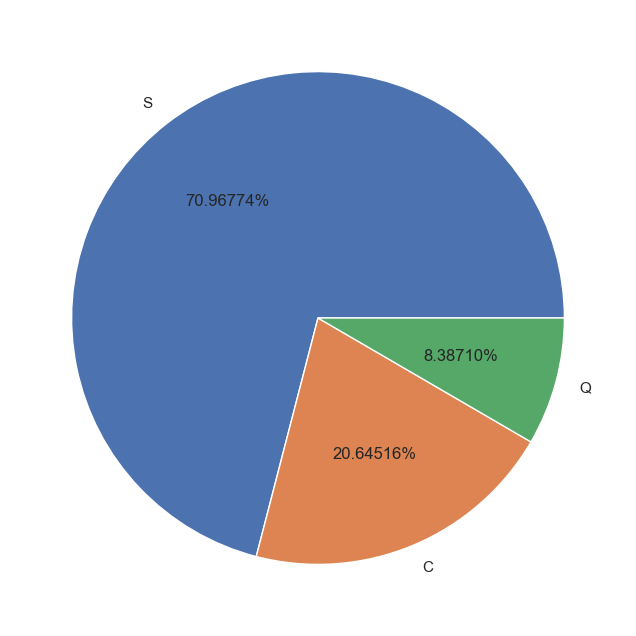

In [25]:
# pie chart

plt.figure(figsize=(8,8))
plt.pie(data.values,
        labels=data.index,
        autopct='%.5f%%');



## 2. Análisis Bivariante
### 2.1 Comparativa de variables cuantitativas (2-4 variables)
#### Boxplot

En este ejemplo veremos cómo de diferentes son las distribuciones de las 4 características que definen a una flor.

[Boxlot](https://seaborn.pydata.org/generated/seaborn.boxplot.html)

In [26]:
plt.figure(figsize=(10,10))
iris_df.columns.values[:4]

array(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'], dtype=object)

<Figure size 1000x1000 with 0 Axes>

El boxplot está bien, pero haay algo de información que se nos escapa

<Axes: >

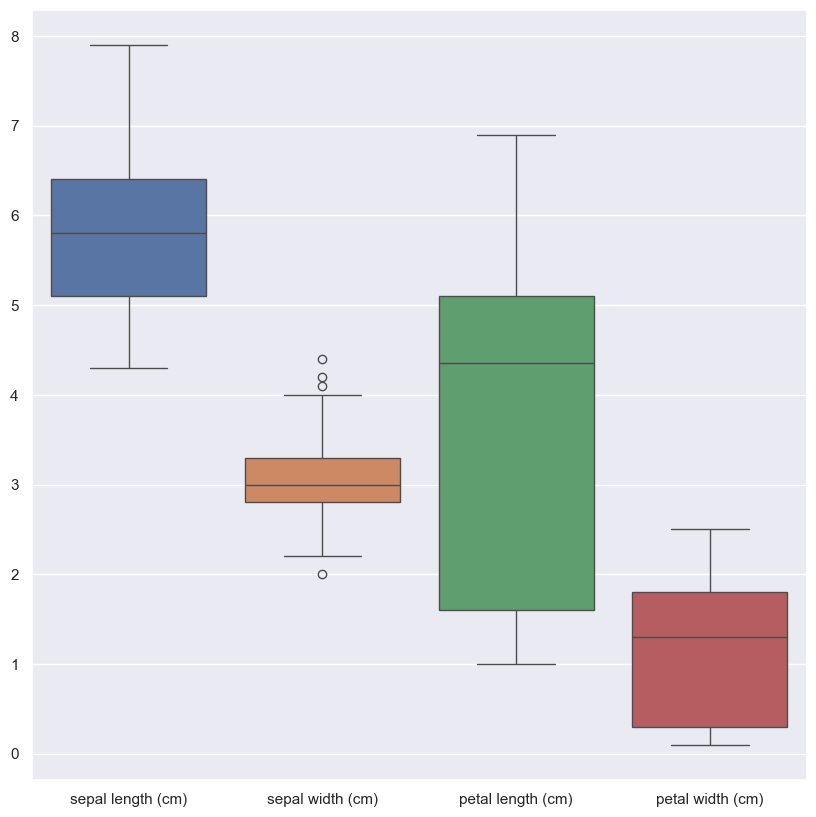

In [27]:
plt.figure(figsize=(10,10))
sns.boxplot(data=iris_df[iris_df.columns.values[0:4]])


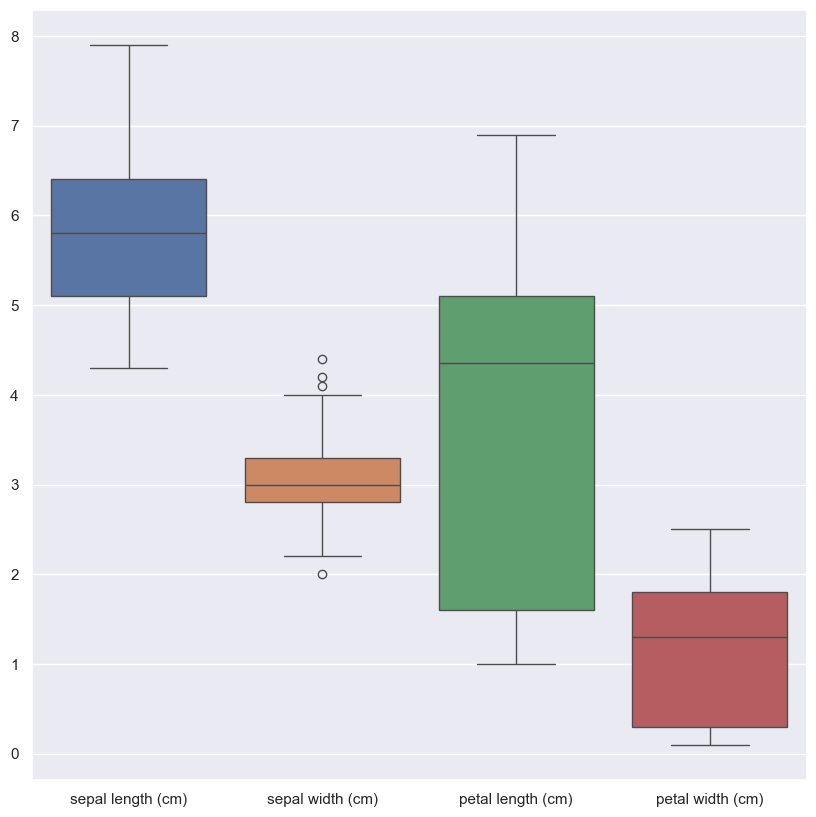

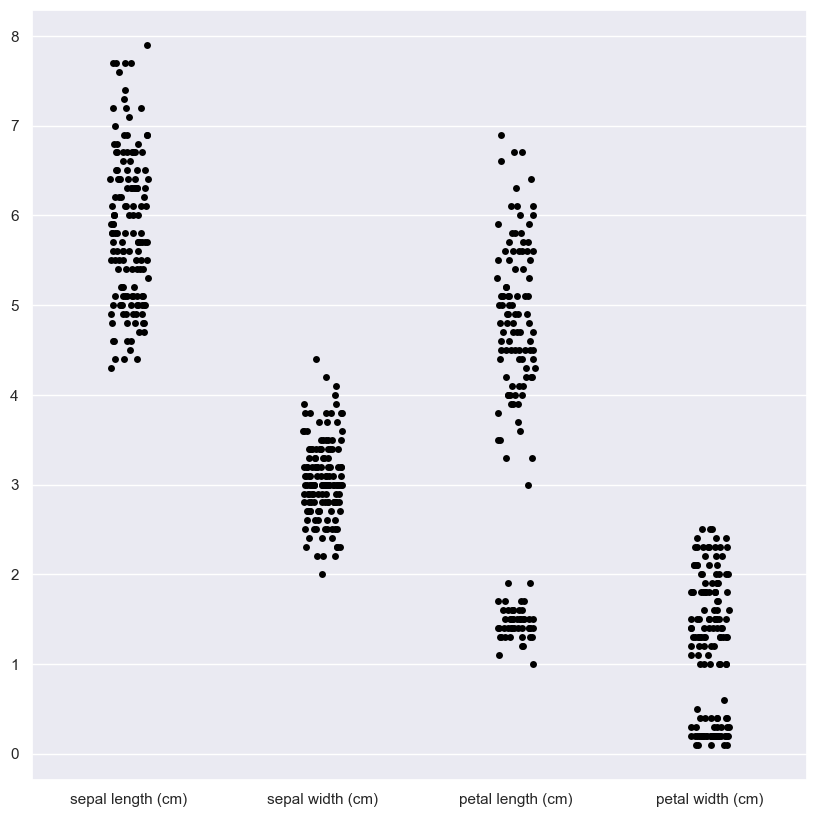

In [28]:
plt.figure(figsize=(10,10))
sns.boxplot(data=iris_df[iris_df.columns.values[0:4]])
plt.figure(figsize=(10,10))
sns.stripplot(data=iris_df[iris_df.columns.values[0:4]], color = 'black');
#sns.swarmplot(data=iris_df[iris_df.columns.values[0:4]], color = 'black');

#### Diagramas de densidad

Otra manera de ver cómo se distribuyen las características de las flores.

[Documentación](https://seaborn.pydata.org/generated/seaborn.kdeplot.html)

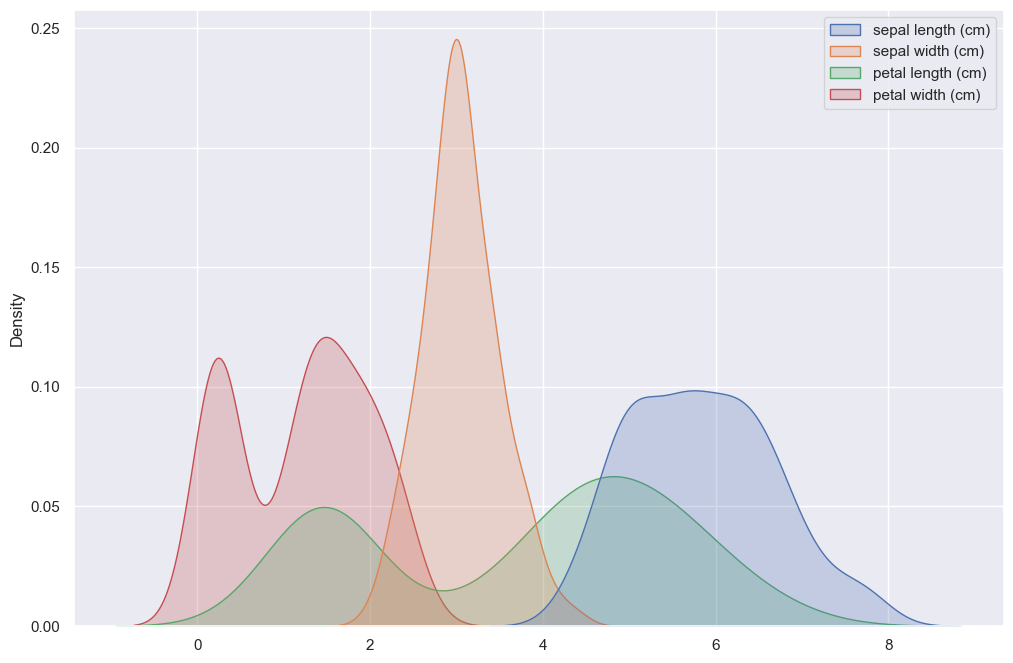

In [29]:
plt.figure(figsize=(12,8))
sns.kdeplot(data = iris_df[iris_df.columns.values[:4]], fill = True);

#### Histogramas

[Documentación](https://seaborn.pydata.org/generated/seaborn.distplot.html)

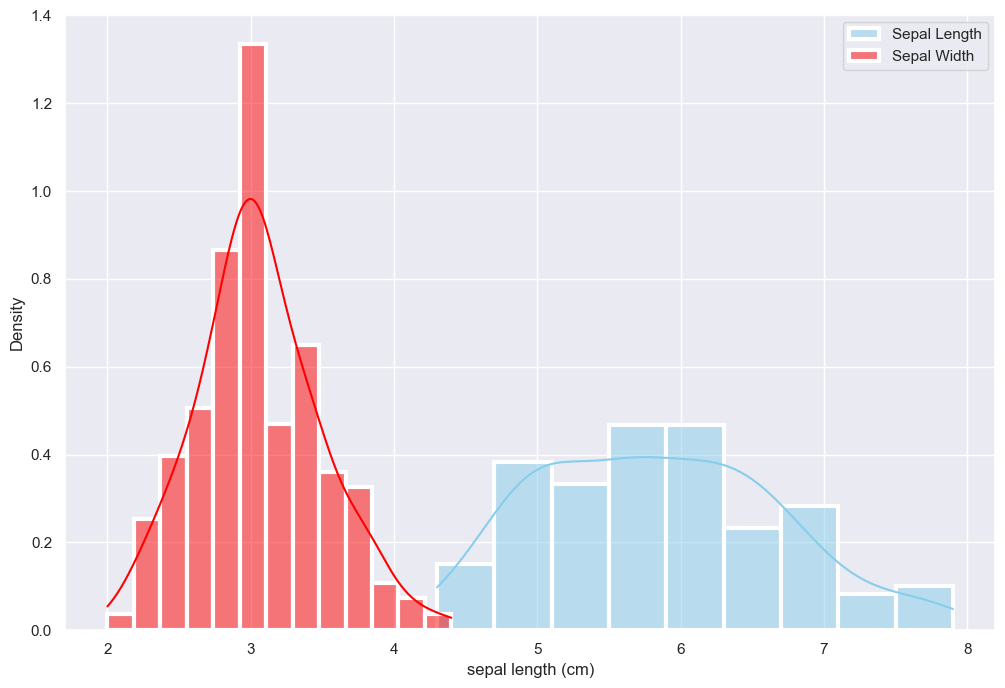

In [30]:
plt.figure(figsize=(12,8))
sns.histplot(iris_df["sepal length (cm)"] , color="skyblue", label="Sepal Length", kde=True, stat="density", linewidth=3)
sns.histplot(iris_df["sepal width (cm)"] , color="red", label="Sepal Width", kde=True, stat="density", linewidth=3)
plt.legend();

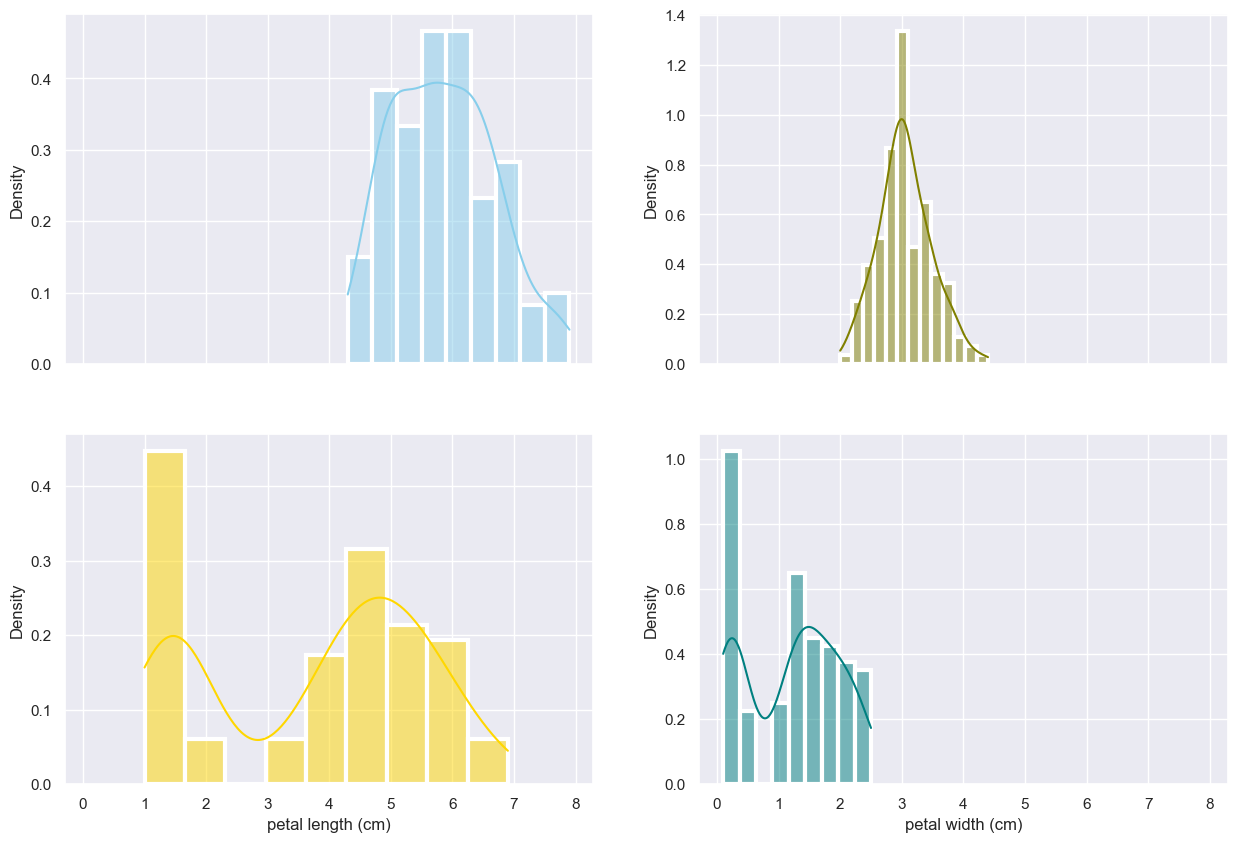

In [31]:
f, axes = plt.subplots(2, 2, figsize=(15,10), sharex=True)
sns.histplot(iris_df["sepal length (cm)"] , color="skyblue", ax=axes[0, 0], kde=True, stat="density", linewidth=3)
sns.histplot(iris_df["sepal width (cm)"] , color="olive", ax=axes[0, 1], kde=True, stat="density", linewidth=3)
sns.histplot(iris_df["petal length (cm)"] , color="gold", ax=axes[1, 0], kde=True, stat="density", linewidth=3)
sns.histplot(iris_df["petal width (cm)"] , color="teal", ax=axes[1, 1], kde=True, stat="density", linewidth=3);

#### Scatter plot

En este ejemplo se ve claramente cómo estas dos variables sirven para distinguir las setosas de los otros tipos

[Documentación](https://seaborn.pydata.org/generated/seaborn.scatterplot.html)

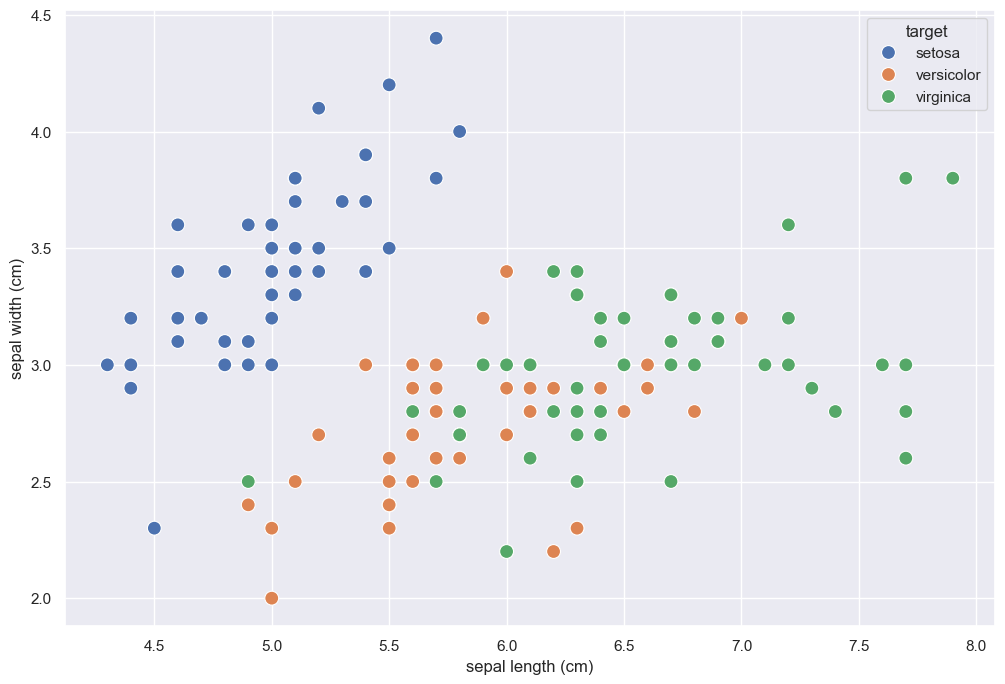

In [32]:
plt.figure(figsize=(12,8))
sns.scatterplot(x = iris_df["sepal length (cm)"],
y = iris_df["sepal width (cm)"],
s = 100,
hue = iris_df["target"]);

[Documentación dataset](https://scikit-learn.org/stable/datasets/index.html#boston-dataset)

[Documentación jointplot](https://seaborn.pydata.org/generated/seaborn.jointplot.html)

% poblacion con poco poder adquisitivo vs media de habitaciones por vivienda

In [33]:
from sklearn.datasets import fetch_california_housing
dataset = fetch_california_housing()
X_full, y_full = dataset.data, dataset.target
feature_names = dataset.feature_names

In [34]:
X_full.shape

(20640, 8)

In [35]:
y_full

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894], shape=(20640,))

In [36]:
california_df = pd.DataFrame(data = np.concatenate((X_full, y_full.reshape(-1,1)), axis=1), columns = feature_names + ["Target"])

In [37]:
california_df.head(2)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.02381,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.97188,2401.0,2.109842,37.86,-122.22,3.585


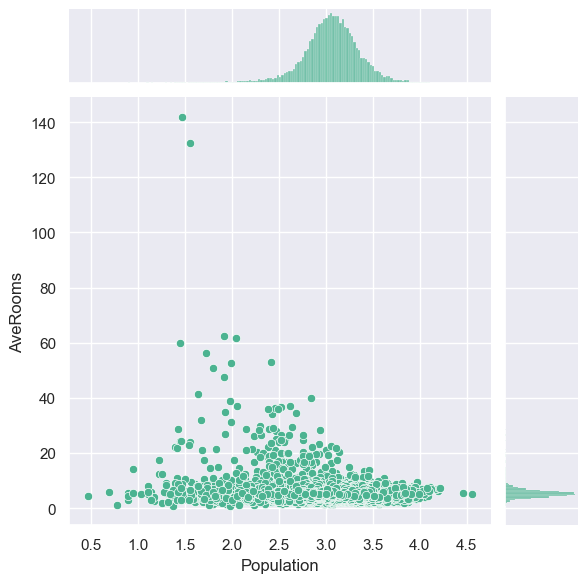

In [38]:
sns.jointplot(x = np.log10(california_df['Population']),
        y = california_df['AveRooms'],
        color = '#4Cb391');

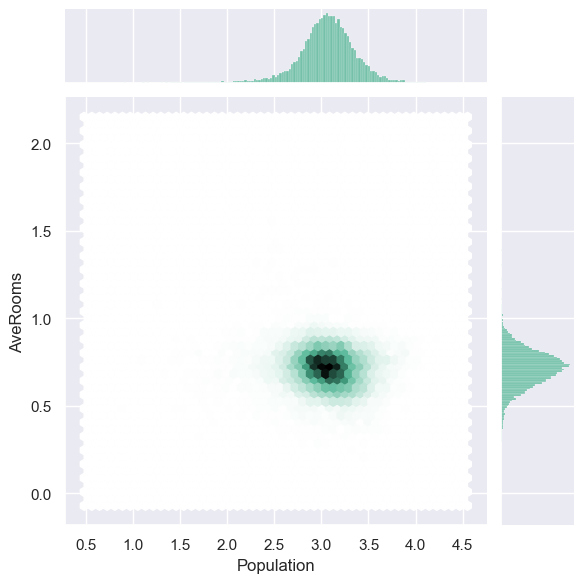

In [39]:
sns.jointplot(x = np.log10(california_df['Population']),
        y = np.log10(california_df['AveRooms']),
        kind = "hex",
        color = '#4Cb391');

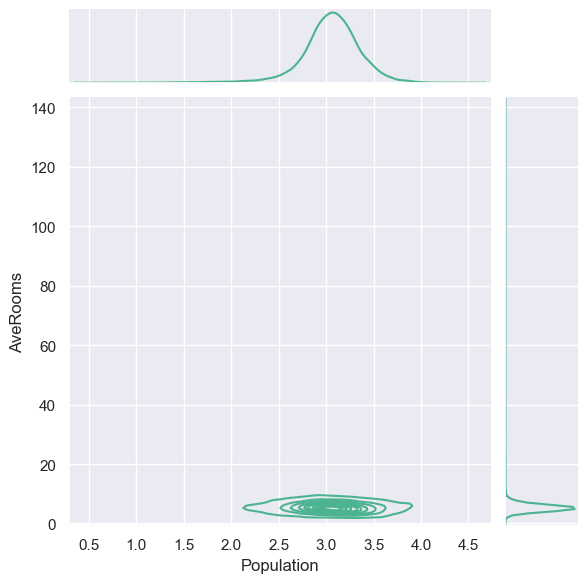

In [40]:
sns.jointplot(x = np.log10(california_df['Population']),
        y = california_df['AveRooms'],
        kind = "kde",
        color = '#4Cb391');

### 2.2 Comparativa de múltiples numéricas

#### Heatmaps

Los heatmaps son perfectos para representar una matriz de correlación

[Documentación heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html)

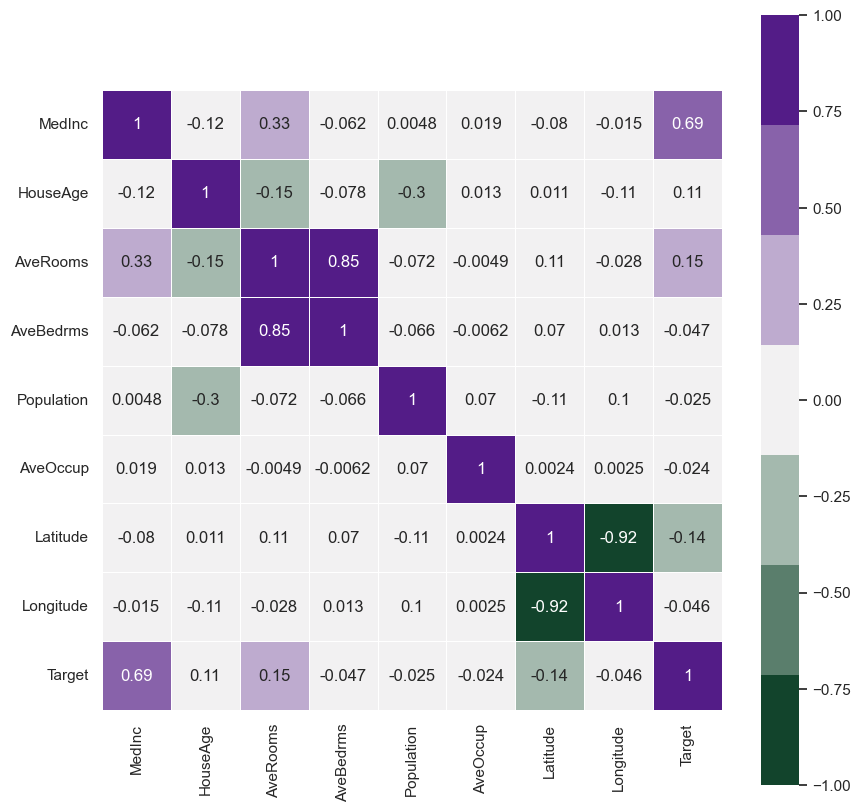

In [41]:
plt.figure(figsize=(10,10))
sns.heatmap(california_df.corr(),
vmin = -1,
vmax = 1,
cmap = sns.diverging_palette(145, 280, s=85, l=25, n=7),
annot = True,
square = True,
linewidth = .5);

También nos permite comparar una variable numérica vs variables categóricas. 

Se recomienda que las dos variables categóricas tengan pocos casos, porque si no, no se va a ver bien el heatmap.

In [42]:
data = market_df.groupby(["Product line", "Payment"]).sum()["Quantity"].unstack()
data = data.loc[["Electronic accessories", "Fashion accessories", "Food and beverages"]]

In [43]:
data

Payment,Cash,Credit card,Ewallet
Product line,,,
Electronic accessories,398,262,311
Fashion accessories,280,293,329
Food and beverages,295,335,322


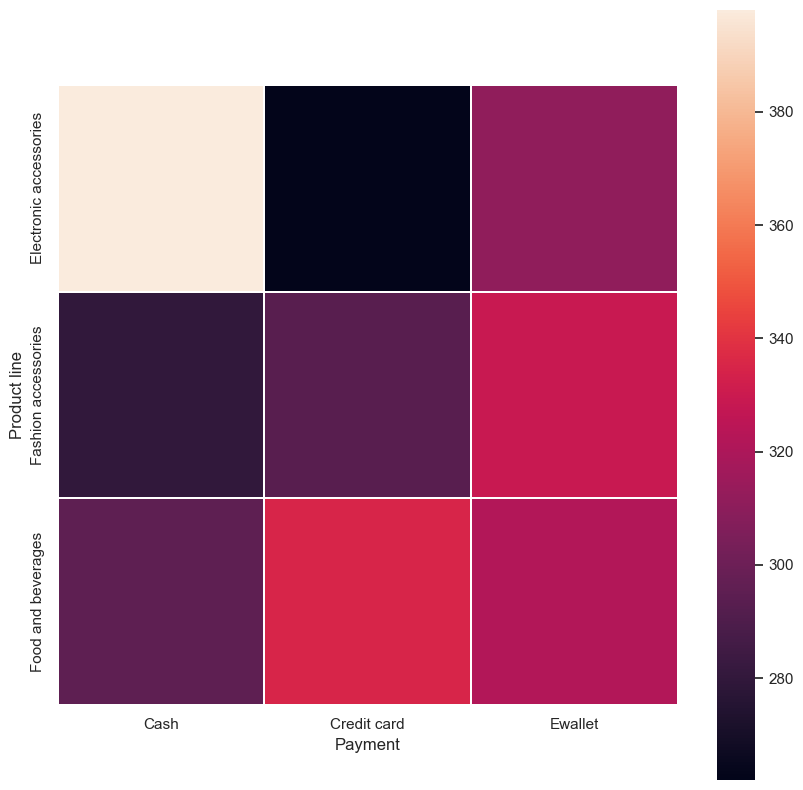

In [44]:
plt.figure(figsize=(10,10))
sns.heatmap(data,
square=True,
linewidths = .3);

#### Correlograma

[Documentación Pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html)

Interesante gráfica para ver en un dataset qué variables presentan correlación lineal, así como sus distribuciones. NO realices esta gráfica con muchas varaibles porque no se va a ver bien. Hazlo por partes.

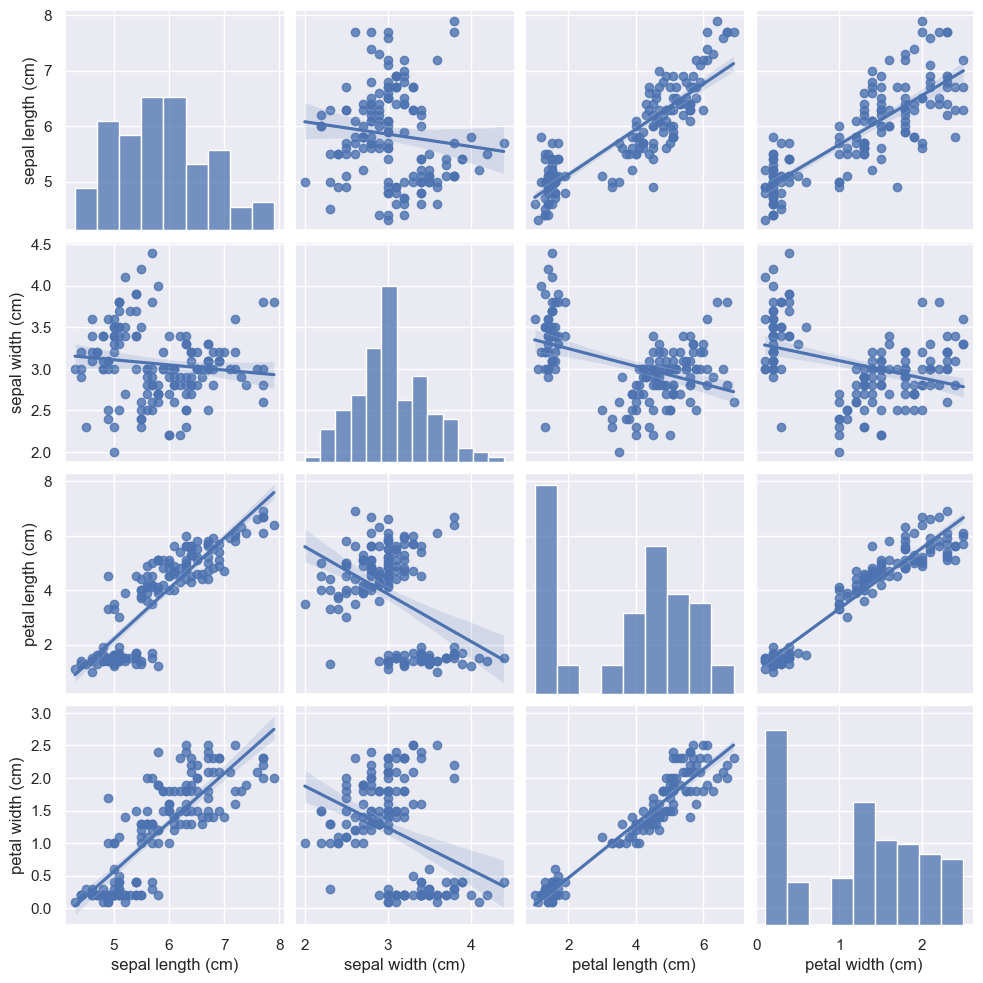

In [45]:
sns.pairplot(iris_df,
kind = "reg");

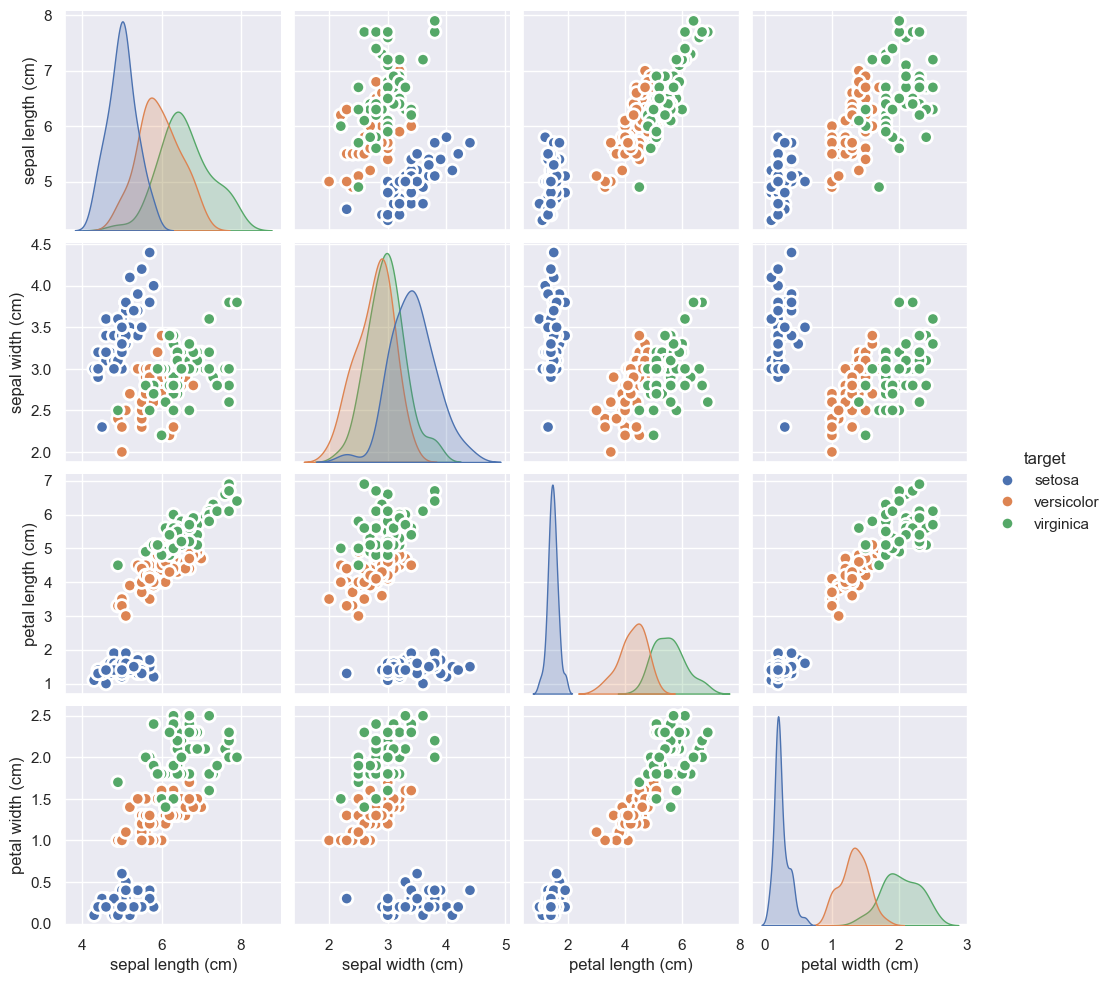

In [46]:
sns.pairplot(iris_df,
kind = "scatter",
hue = "target",
plot_kws = dict(s = 80, edgecolor = "white", linewidth = 2));

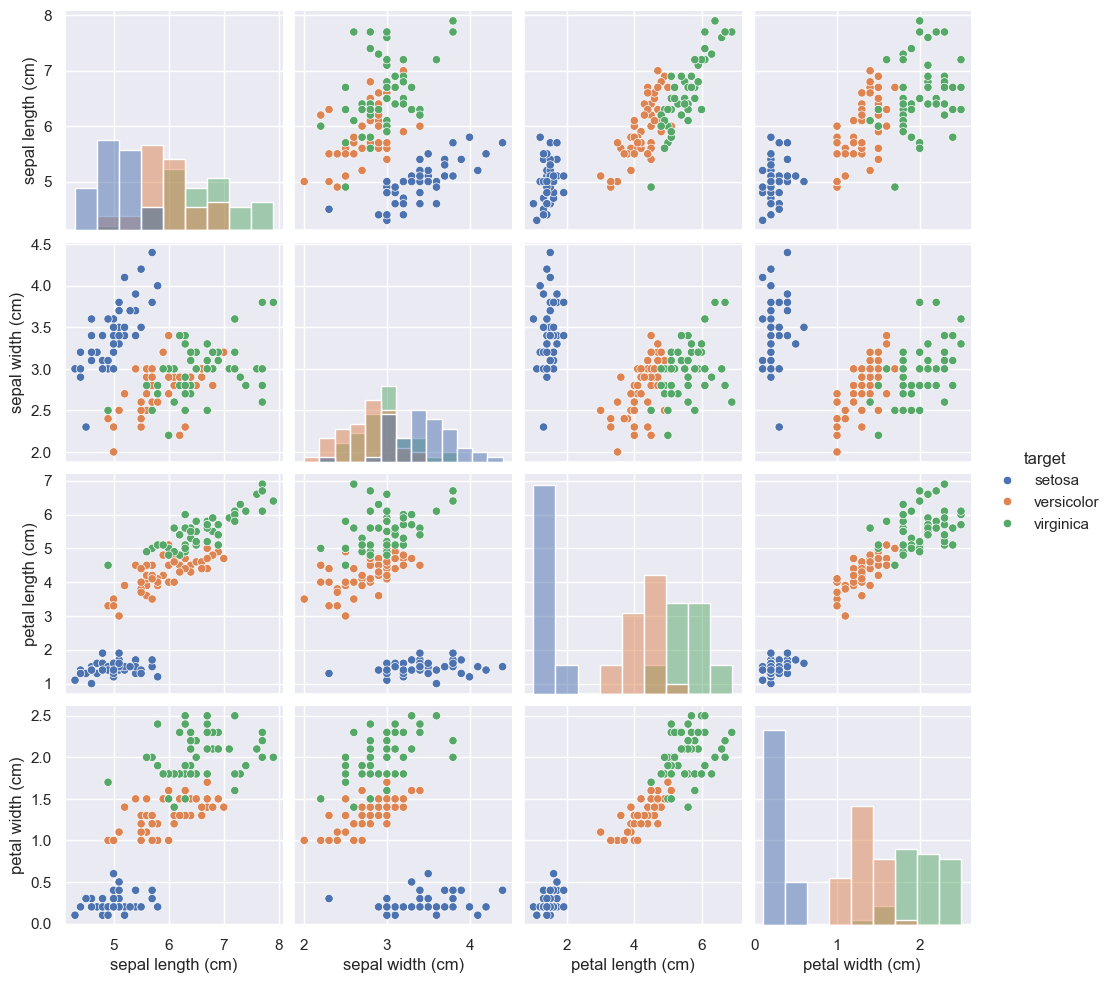

In [47]:
sns.pairplot(iris_df,
             kind="scatter",
             hue="target",
             diag_kind="hist");

### 2.3 Comparativa de dos variables cualitativas
#### Tabla

[Documentacion](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html)

Lo más sencillo, una tabla con la frecuencia de valores. Esto es factible cuando los elementos únicos por categoría no son muchos.

In [48]:
pd.crosstab(titanic_df["Embarked"],
titanic_df["Fare"])

Fare,6.7500,6.9750,7.0500,7.1417,7.2250,7.2292,7.2500,7.3125,7.6500,7.7500,...,71.2833,73.5000,76.7292,77.2875,79.2000,82.1708,83.4750,146.5208,247.5208,263.0000
Embarked,,,,,,,,,,,,,,,,,,,,,
C,0,0,0,0,2,3,0,0,0,0,...,1,0,1,0,1,1,0,1,1,0
Q,1,0,0,0,0,0,0,0,0,4,...,0,0,0,0,0,0,0,0,0,0
S,0,1,1,1,0,0,2,1,2,1,...,0,2,0,2,0,0,1,0,0,2


#### Diagrama de barras

[Documentacion](https://seaborn.pydata.org/generated/seaborn.catplot.html)

En un diagrama de barras también se entiende la representación de dos variables cualitativas

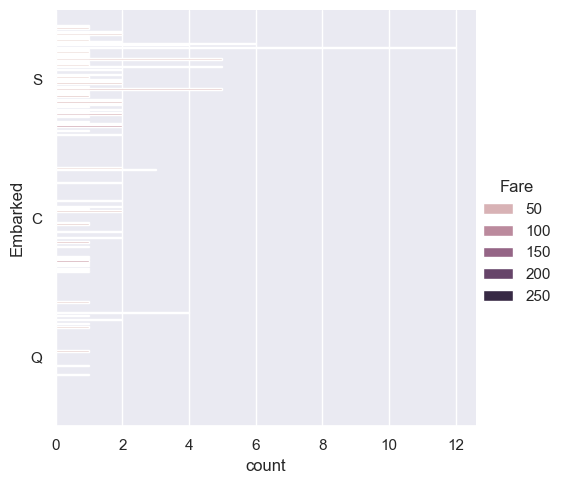

In [49]:
sns.catplot(y = "Embarked",
hue = "Fare",
orient = "H",
kind = "count",
data = titanic_df);

Otra manera de visualizar dos o más variables categóricas

<Figure size 3000x1000 with 0 Axes>

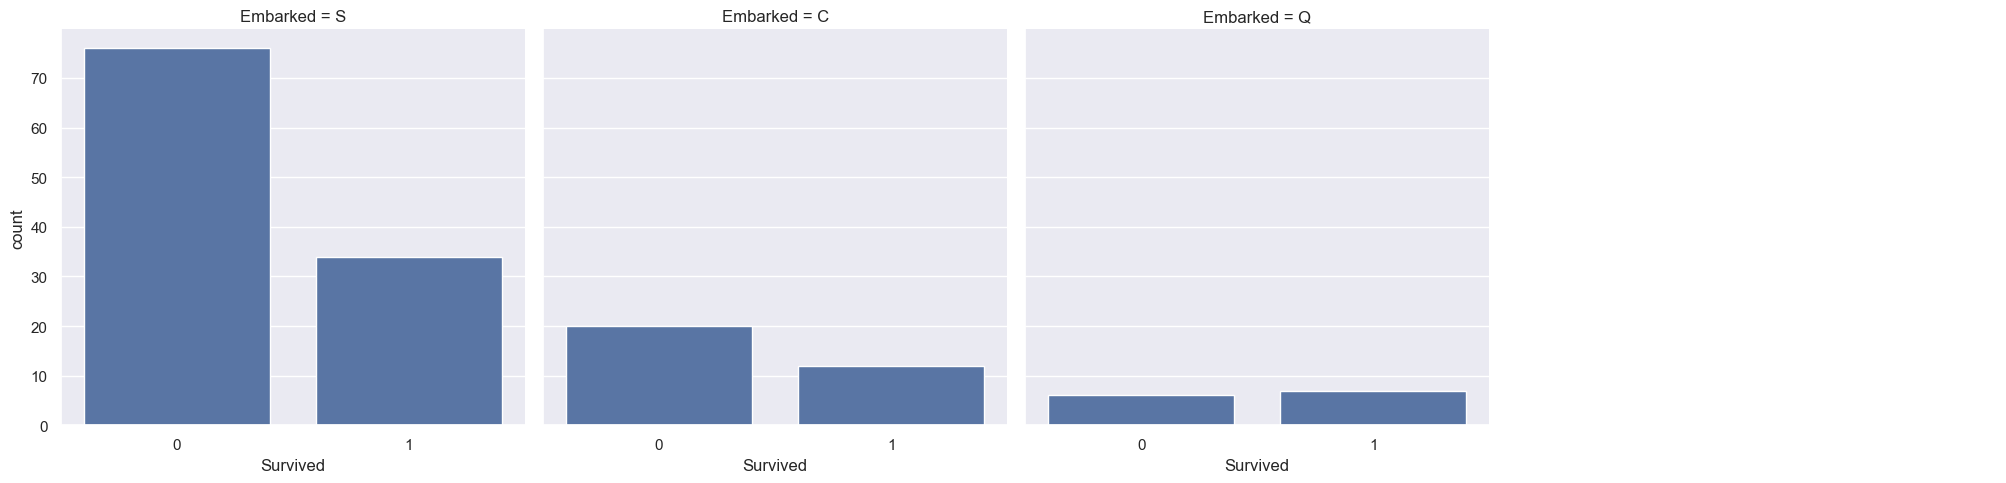

In [50]:
plt.figure(figsize=(30,10));
sns.catplot(x="Survived",
            col="Embarked",
            col_wrap=4,
            data=titanic_df,
            kind="count");

In [51]:
titanic_df.groupby(["Embarked", "Survived"]).size().reset_index().pivot(columns = "Embarked", index = "Survived", values = 0)

Embarked,C,Q,S
Survived,,,
0,20,6,76
1,12,7,34


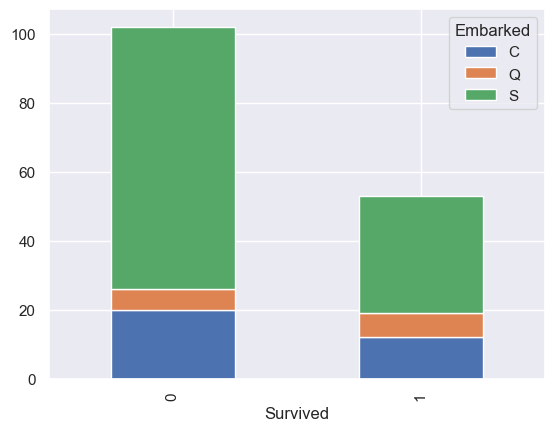

In [52]:
df_plot = titanic_df.groupby(['Embarked', 'Survived']).size().reset_index().pivot(columns='Embarked', index='Survived', values=0)
df_plot.plot(kind='bar', stacked=True);

### 2.4 Cualitativa vs cuantitativa
#### Time series

[Documentacion](https://seaborn.pydata.org/generated/seaborn.lineplot.html)

Las series temporales tienen la particularidad de que son datos ordenados

In [53]:
eventos_df = pd.read_csv("./data/holidays_events.csv")
eventos_df.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [54]:
eventos_df.type.unique()

array(['Holiday', 'Transfer', 'Additional', 'Bridge', 'Work Day', 'Event'],
      dtype=object)

In [55]:
eventos_df = eventos_df.loc[eventos_df.type.isin(["Holiday", "Event", "Bridge"]),:]
eventos_df["year"] = eventos_df.loc[:, "date"].str[:4].astype(int)
eventos_df = eventos_df.groupby(["locale", "year"]).sum()
eventos_df.reset_index(inplace=True)

In [56]:
eventos_df.head()

,locale,year,date,type,locale_name,description,transferred
0,Local,2012,2012-03-022012-04-122012-04-142012-04-212012-0...,HolidayHolidayHolidayHolidayHolidayHolidayHoli...,MantaCuencaLibertadRiobambaPuyoGuarandaLatacun...,Fundacion de MantaFundacion de CuencaCantoniza...,0
1,Local,2013,2013-03-022013-04-122013-04-142013-04-212013-0...,HolidayHolidayHolidayHolidayHolidayHolidayHoli...,MantaCuencaLibertadRiobambaPuyoGuarandaMachala...,Fundacion de MantaFundacion de CuencaCantoniza...,0
2,Local,2014,2014-03-022014-04-122014-04-142014-04-212014-0...,HolidayHolidayHolidayHolidayHolidayHolidayHoli...,MantaCuencaLibertadRiobambaPuyoGuarandaLatacun...,Fundacion de MantaFundacion de CuencaCantoniza...,0
3,Local,2015,2015-03-022015-04-122015-04-142015-04-212015-0...,HolidayHolidayHolidayHolidayHolidayHolidayHoli...,MantaCuencaLibertadRiobambaPuyoGuarandaMachala...,Fundacion de MantaFundacion de CuencaCantoniza...,0
4,Local,2016,2016-03-022016-04-122016-04-142016-04-212016-0...,HolidayHolidayHolidayHolidayHolidayHolidayHoli...,MantaCuencaLibertadRiobambaPuyoGuarandaMachala...,Fundacion de MantaFundacion de CuencaCantoniza...,1


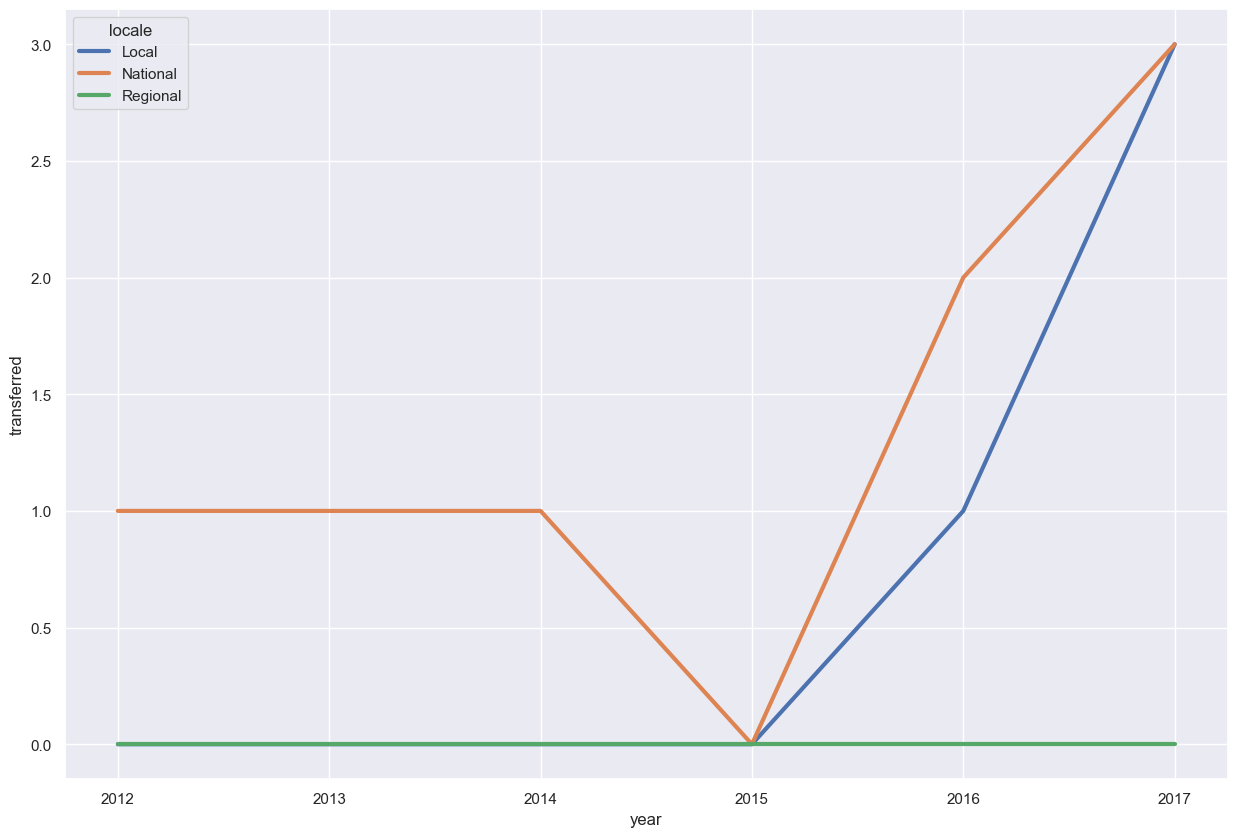

In [57]:
plt.figure(figsize=(15,10))
sns.lineplot(data=eventos_df,
x = "year",
y= "transferred",
hue = "locale",
linewidth = 3);

#### Treemap
Un treemap es una opción muy interesante para mostrar una variable numérica vs una categórica

In [ ]:
%pip install squarify

In [59]:
eventos_df.groupby("locale").sum()["transferred"].sort_values(ascending=False)

locale
National    8
Local       4
Regional    0
Name: transferred, dtype: int64

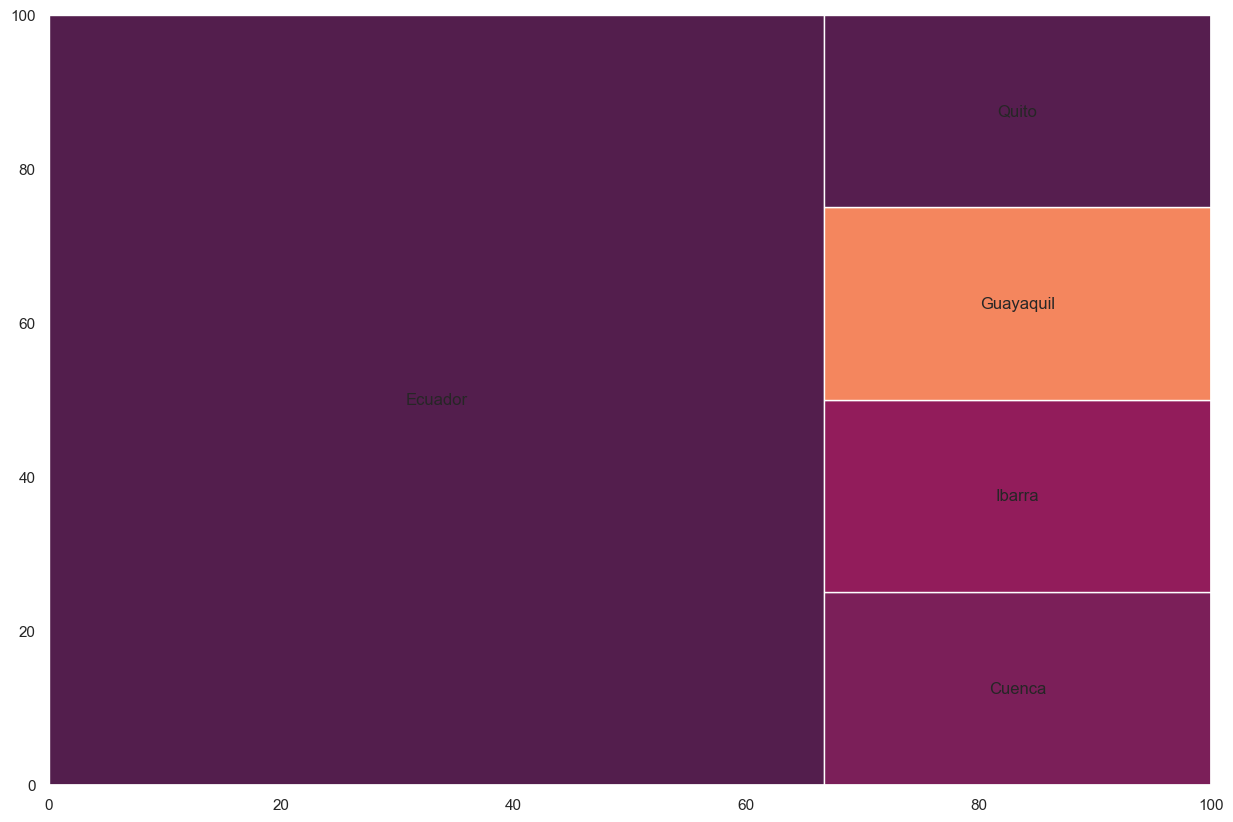

In [60]:
import squarify

eventos_df = pd.read_csv("./data/holidays_events.csv")
eventos_df = eventos_df.loc[eventos_df.type.isin(["Holiday", "Event", "Bridge"]),:]

data = eventos_df.groupby("locale_name").sum()["transferred"].sort_values(ascending=False)[:5]

plt.figure(figsize=(15,10))
squarify.plot(sizes = data.values, label = data.index);

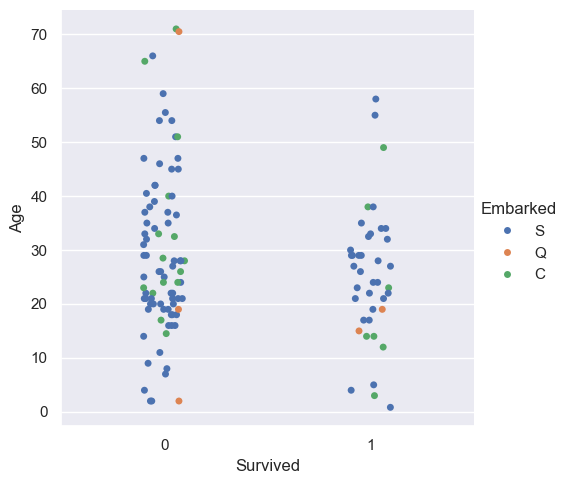

In [61]:
sns.catplot(x = "Survived", y = "Age", hue = "Embarked", data = titanic_df);

El equivalente con un diagrama de caja sería el siguiente

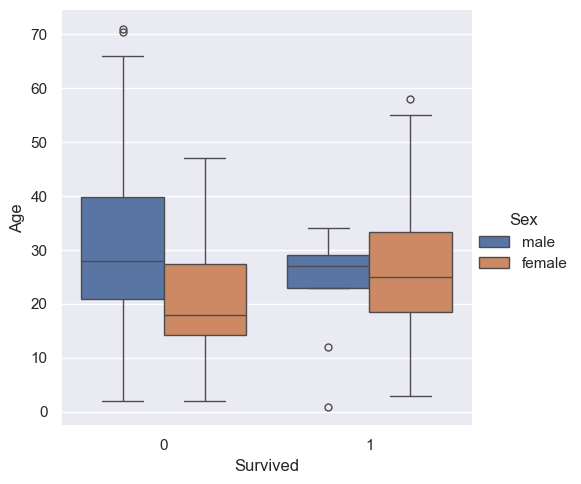

In [62]:
sns.catplot(x="Survived", y="Age", hue="Sex", kind="box", data=titanic_df);

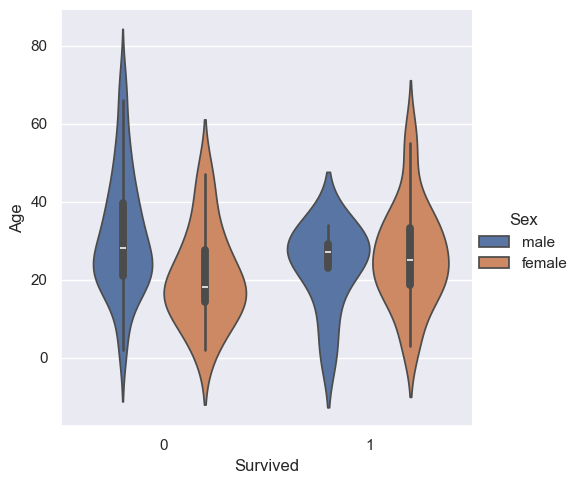

In [63]:
sns.catplot(x="Survived", y="Age", hue="Sex", kind="violin", data=titanic_df);

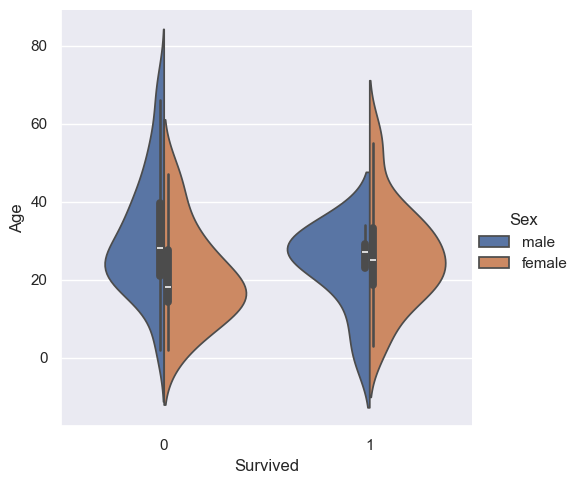

In [64]:
sns.catplot(x="Survived", y="Age", hue="Sex", kind="violin", split = True, data=titanic_df);

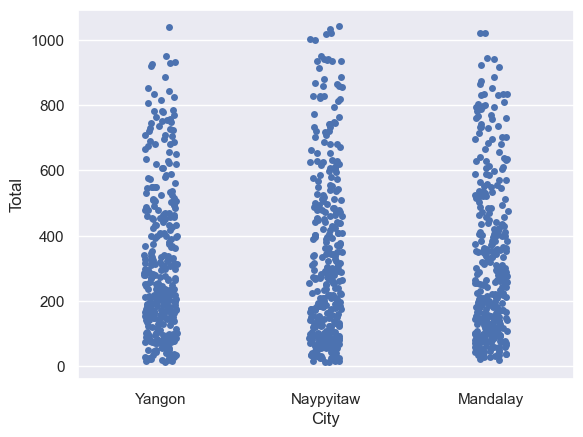

In [65]:
sns.stripplot(x="City", y="Total", data=market_df);

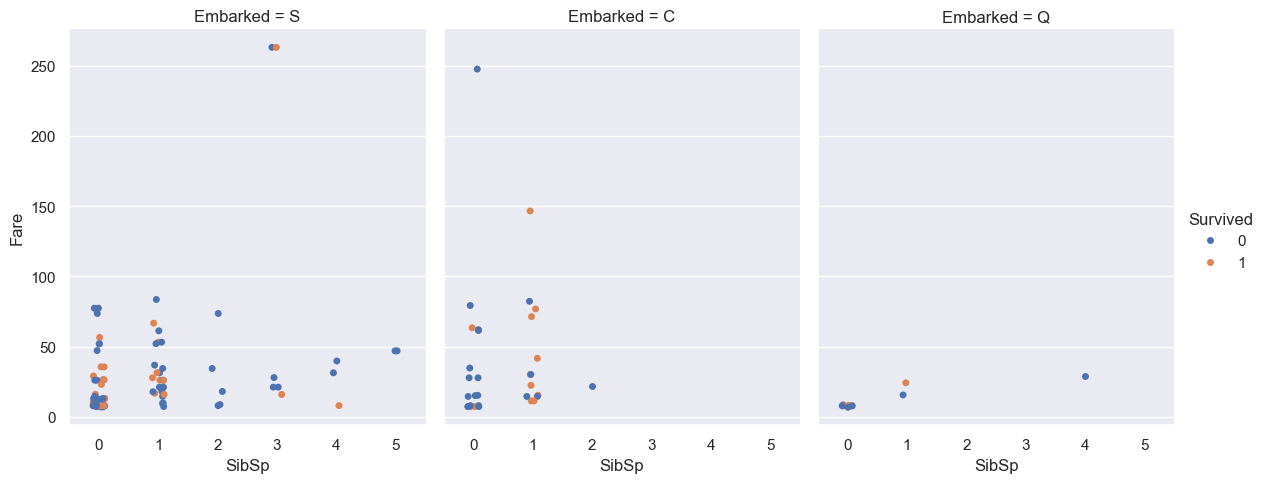

In [66]:
sns.catplot(x="SibSp",
            y="Fare",
            hue="Survived",
            col="Embarked",
            data=titanic_df,
            height=5,
            aspect=.8);

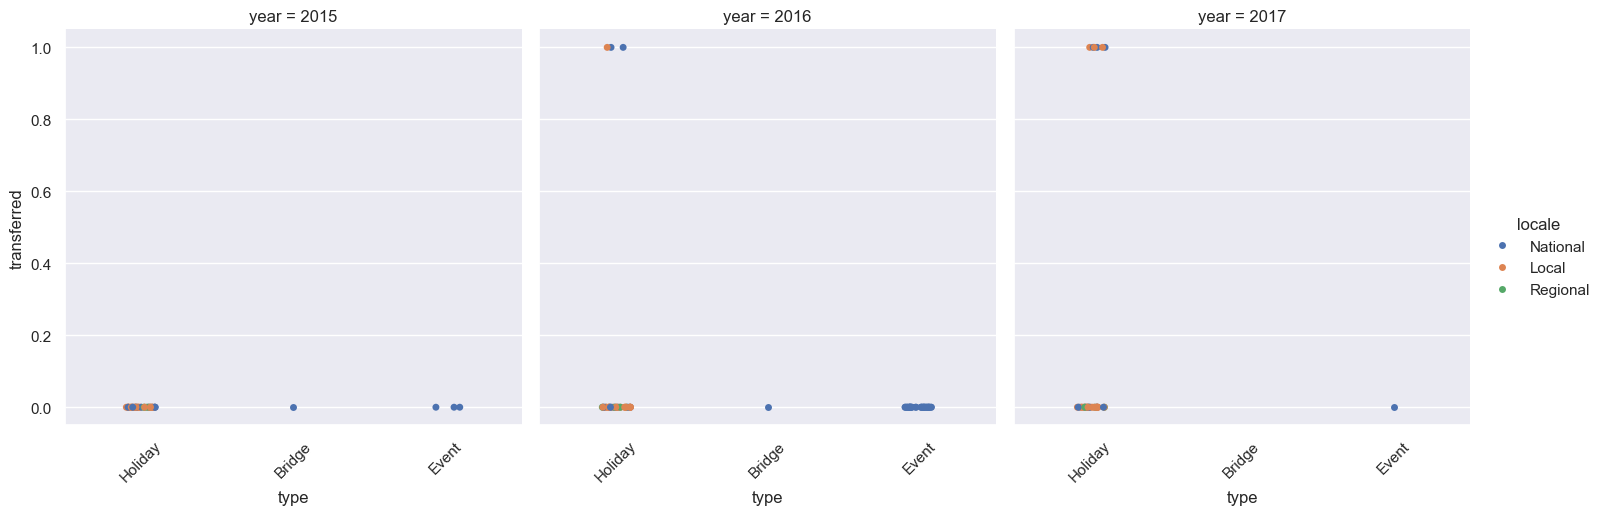

In [67]:
import seaborn as sns
eventos_df = pd.read_csv('./data/holidays_events.csv')
eventos_df = eventos_df.loc[eventos_df.type.isin(['Holiday', 'Event', 'Bridge']),:]
eventos_df['year'] = eventos_df['date'].str[:4].astype(int)
eventos_df = eventos_df.loc[eventos_df.year.isin([2015, 2016, 2017]),:]

chart = sns.catplot(x = 'type',
                   y = 'transferred',
                   hue = 'locale',
                   col = 'year',
                   data  = eventos_df)

chart.set_xticklabels(rotation = 45);

In [68]:
suicid_df2 = suicid_df[suicid_df['country'].isin(['Spain', 'Germany', 'France'])]



NameError: name 'suicid_df' is not defined

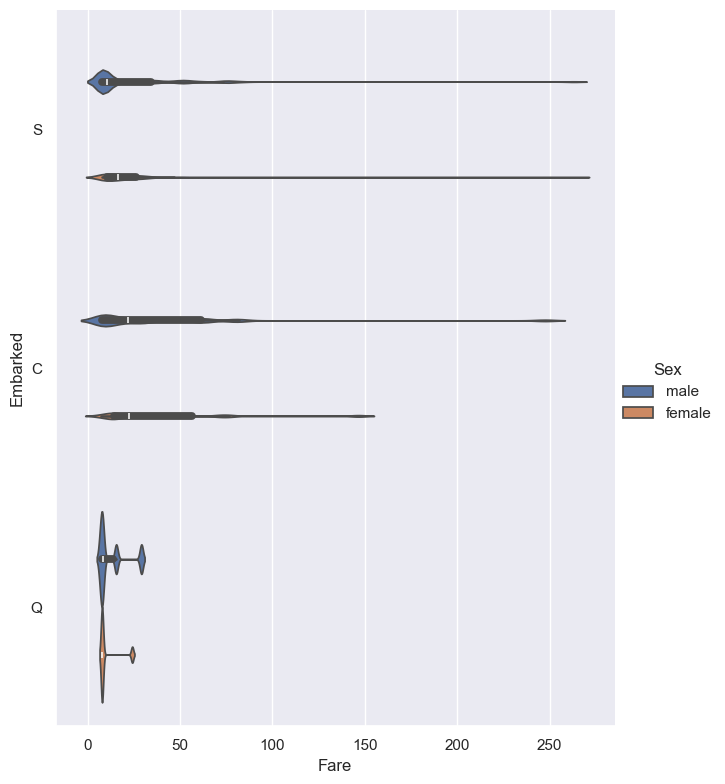

In [ ]:
sns.catplot(x="Fare",
            y="Embarked",
            hue="Sex",
            kind="violin",
            bw_method=.1,
            height=8,
            aspect=.8,
            data=titanic_df);

In [ ]:
plt.figure(figsize=(10,5))


<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

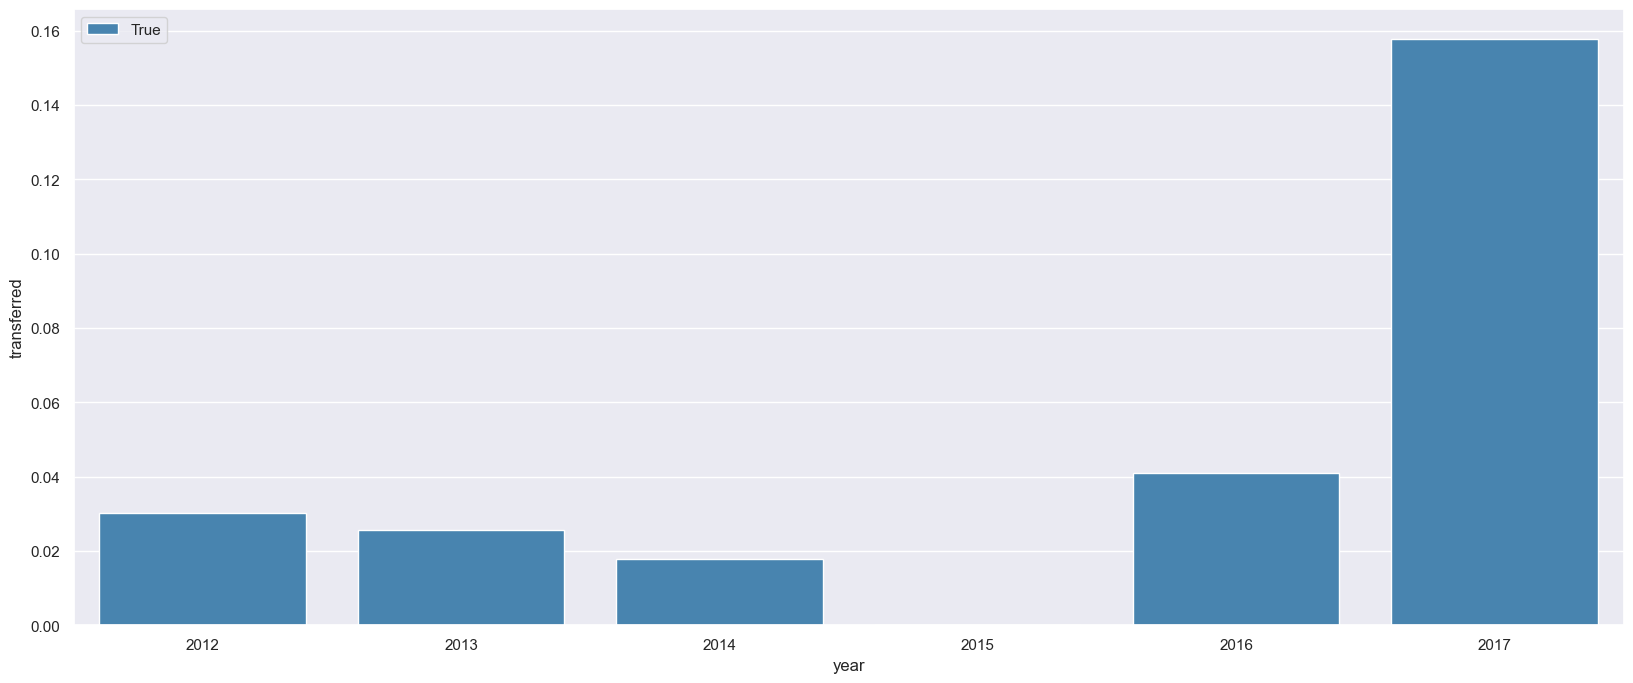

In [ ]:
eventos_df = pd.read_csv('./data/holidays_events.csv')
eventos_df = eventos_df.loc[eventos_df.type.isin(['Holiday', 'Event', 'Bridge']),:]
eventos_df['year'] = eventos_df['date'].str[:4].astype(int)

plt.figure(figsize=(20,8))
sns.barplot(x = 'year',
           y = 'transferred',
           hue=True,
           palette = 'Blues_d',
           data = eventos_df,
           errorbar = None);

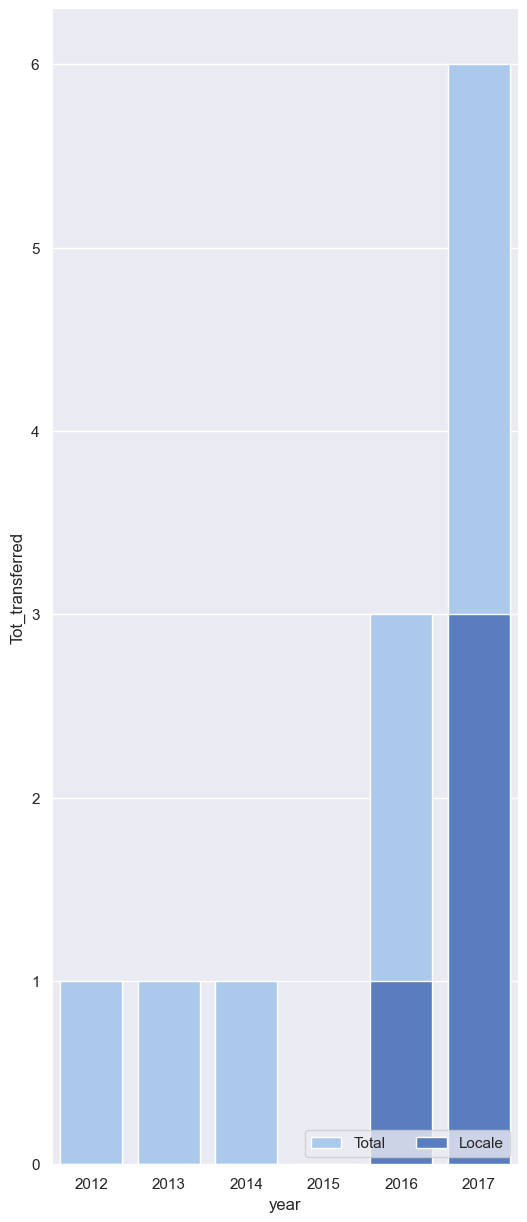

In [ ]:
f, ax = plt.subplots(figsize=(6, 15))

df1 = eventos_df.groupby('year').sum()['transferred']
df2 = eventos_df[eventos_df['locale'] == 'Local'].groupby('year').sum()['transferred']
df1 = df1[df1.index.isin(df2.index)]

df_tot = pd.DataFrame({"Tot_transferred": df1, "Locale": df2}).sort_values("Tot_transferred", ascending=False)[:20]
df_tot.reset_index(level=0, inplace=True)

sns.set_color_codes("pastel")
sns.barplot(x="year", y="Tot_transferred", data=df_tot,
            label="Total", color="b")

sns.set_color_codes("muted")
sns.barplot(x="year", y="Locale", data=df_tot,
            label="Locale", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
sns.despine(left=True, bottom=True)

#### Bubble chart

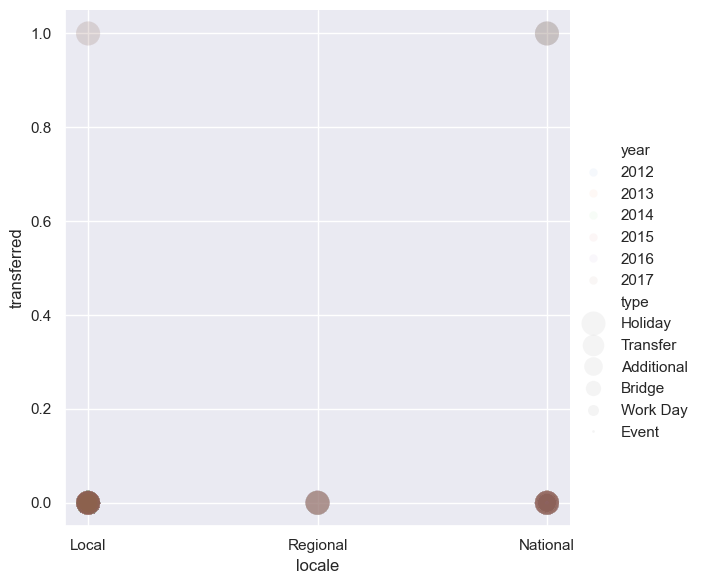

In [ ]:
eventos_df = pd.read_csv('./data/holidays_events.csv')
eventos_df['year'] = eventos_df['date'].str[:4].astype(int)
eventos_df2 = eventos_df

sns.relplot(data=eventos_df2,
            x="locale",
            y="transferred",
            hue="year", size="type",
            sizes=(4, 300),
            alpha=.05, palette="muted",
            height=6);

#### 